In [1]:
import pandas as pd

In [2]:
golf_data=pd.read_csv('D:\RR\python\weather_data.csv')
golf_data.head(10)

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


In [3]:
y=golf_data["Play"]
x=golf_data.drop(["Play"],axis=1)

In [55]:
x

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Cool,Normal,Weak
4,Rain,Cool,Normal,Strong
5,Sunny,Mild,High,Weak
6,Sunny,Cool,Normal,Weak
7,Rain,Mild,Normal,Weak
8,Sunny,Mild,Normal,Strong
9,Overcast,Mild,High,Strong


x_dummies =pd.get_dummies(x)

In [56]:
x_dummies = pd.get_dummies(x)


In [57]:
x_dummies

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0
5,0,0,1,0,0,1,1,0,0,1
6,0,0,1,1,0,0,0,1,0,1
7,0,1,0,0,0,1,0,1,0,1
8,0,0,1,0,0,1,0,1,1,0
9,1,0,0,0,0,1,1,0,1,0


In [59]:
x_dummies.shape

(14, 10)

In [60]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,test_size=0.3)

In [61]:
from sklearn.tree import DecisionTreeClassifier
#default criterion is gini indicating gini impurity
#use 'entropy' 

In [62]:
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train,y_train) #does all internal calculation

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
y_pred=clf.predict(x_test)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [64]:
y_test


8     Yes
6     Yes
4      No
11     No
2     Yes
Name: Play, dtype: object

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix\n',cm)
print("accuracy is",clf.score(x_test,y_test)*100)

confusion matrix
 [[0 2]
 [2 1]]
accuracy is 20.0


In [66]:
import sklearn
sklearn.__version__

'0.21.2'

In [67]:
cols=list(x_dummies.columns.values)
cols


['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']

In [68]:
from sklearn import tree
import matplotlib.pyplot as plt

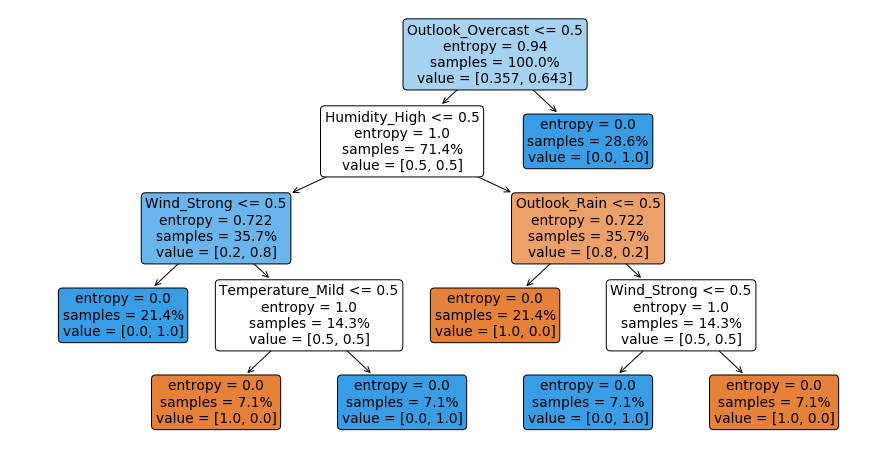

In [69]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()